In [58]:
from sklearn.datasets import fetch_olivetti_faces as of
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import seaborn as sn

In [59]:
olivetti = of()

In [60]:
data = olivetti.data
y = olivetti.target

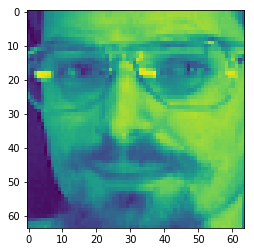

In [61]:
# Showing image
r = random.randint(0,400)
img = olivetti.images[r]
plt.imshow(img)
plt.show()

In [62]:
from sklearn.preprocessing import StandardScaler
data = StandardScaler().fit_transform(data)
print(data.shape)

(400, 4096)


In [63]:
from sklearn.manifold import TSNE

In [64]:
# data = data[0:100,:]
# y = olivetti.target
# y = y[0:100]

In [65]:
model = TSNE(n_components=2,random_state=0,perplexity=20)
red_data = model.fit_transform(data)
red_data.shape

/home/cstgpu/anaconda3/envs/dcon/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


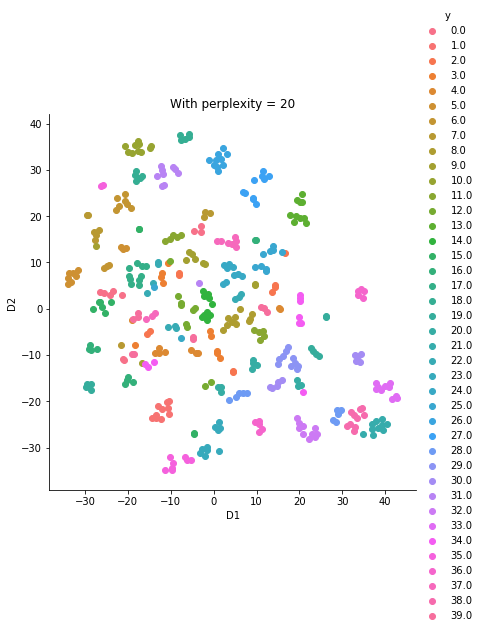

In [68]:
red_data = np.vstack((red_data.T,y)).T
df = pd.DataFrame(data=red_data, columns=("D1", "D2", "y"))

sn.FacetGrid(df, hue="y", size=6).map(plt.scatter, 'D1', 'D2').add_legend()
plt.title('With perplexity = 20')
plt.show()

In [71]:
model = TSNE(n_components=2,random_state=0,perplexity=30,n_iter=2000)
red_data = model.fit_transform(data)
red_data.shape

(400, 2)

/home/cstgpu/anaconda3/envs/dcon/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


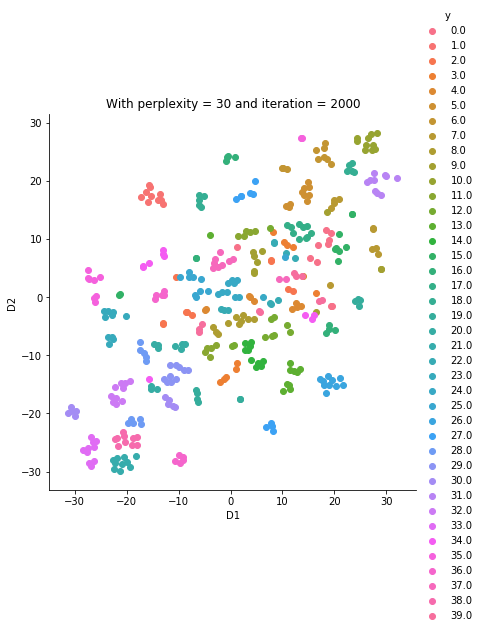

In [70]:
#Plotting
red_data = np.vstack((red_data.T,y)).T
df = pd.DataFrame(data=red_data, columns=("D1", "D2", "y"))

sn.FacetGrid(df, hue="y", size=6).map(plt.scatter, 'D1', 'D2').add_legend()
plt.title('With perplexity = 30 and iteration = 2000')
plt.show()

In [74]:
model = TSNE(n_components=2,random_state=0,perplexity=30,n_iter=5000)
red_data = model.fit_transform(data)
red_data.shape

(400, 2)

/home/cstgpu/anaconda3/envs/dcon/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


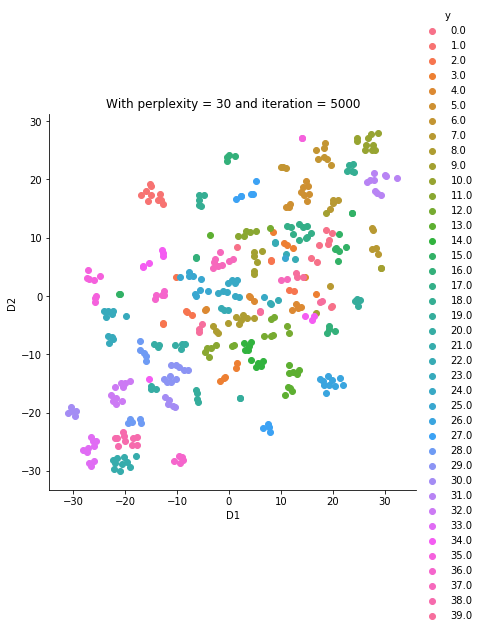

In [75]:
#Plotting
red_data = np.vstack((red_data.T,y)).T
df = pd.DataFrame(data=red_data, columns=("D1", "D2", "y"))

sn.FacetGrid(df, hue="y", size=6).map(plt.scatter, 'D1', 'D2').add_legend()
plt.title('With perplexity = 30 and iteration = 5000')
plt.show()

In [79]:
model = TSNE(n_components=2,random_state=0,perplexity=50,n_iter=5000)
red_data = model.fit_transform(data)
red_data.shape

(400, 2)

/home/cstgpu/anaconda3/envs/dcon/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


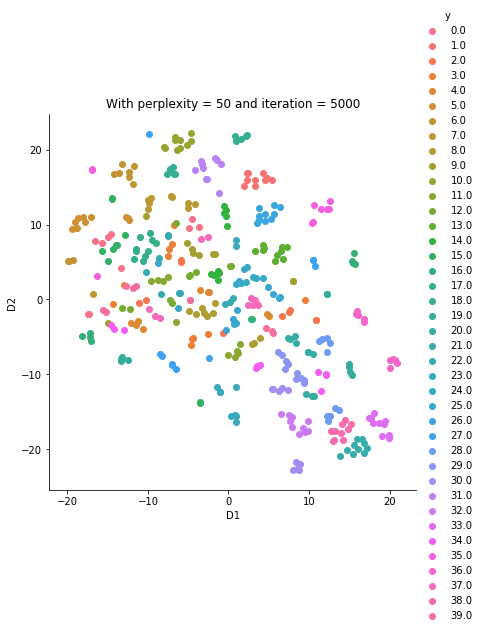

In [80]:
#Plotting
red_data = np.vstack((red_data.T,y)).T
df = pd.DataFrame(data=red_data, columns=("D1", "D2", "y"))

sn.FacetGrid(df, hue="y", size=6).map(plt.scatter, 'D1', 'D2').add_legend()
plt.title('With perplexity = 50 and iteration = 5000')
plt.show()

Here we can see shape stablized now increasing the iteration won't change shape and it's perfect.

Major things we should keep in mind while using t-SNE algorithm
- Never run your model for single perplexity
- Perplexity not equal to number of data points
- Rerun your model multiple times
- Stop when the shape stablizes

### I also implemented t-SNE in very nice tool named Tensorboard for visualization by Tensorflow team

In [ ]:
from tensorboardX import SummaryWriter
writer = SummaryWriter()
writer.add_embedding(data,metadata=y,global_step=1,tag="Olivetti Face t-SNE plot")